In [1]:
from Dissects.skel import Skel
from Dissects.utils import clean_skeleton

import os
from skimage import io
import numpy as np
import pandas as pd
import copy
import sys
import matplotlib.pyplot as plt
sys.setrecursionlimit(10000)




In [492]:
# directory='/home/admin-suz/Documents/testCellSeg/TestSPIM/'
# # import image
# skeleton = Skel(os.path.join(directory,'C1-20191112_SQHrfp-EcadGFP_DLG647_180degre_04-1.fits_c100.up.NDskl.a.NDskl'))

directory='/home/admin-suz/Documents/testCellSeg/Test1/'
skeleton = Skel(os.path.join(directory,'im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl'))

if skeleton.isValid():
    skeleton.write_vtp(os.path.join(directory, "image_original.vtp"))
else:
    raise nameError('skeleton not valid')   
    
# lecture de l'image tif, pour récupérer le ratio depth/xy pixel

reading: 3763 critical points
reading: 3648 filaments
reading: critical points data
critical points done
reading: filaments data
Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/image_original.vtp 



In [493]:
clean_skeleton(skeleton)

Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl/_removefil.vtp 



In [494]:
data_crit = []

for c in skeleton.crit:
    data_crit.append(
        {
            "id":c,
            "x": c.pos[0],
            "y": c.pos[1],
            "z": c.pos[2] * 0.22/0.18,
            "n_fil": c.nfil,
            "val": int(c.val),
            "pair": c.pair,
            "type":int(c.typ),
            "destCritId_addr":c.destCritId,
            "filId":c.filId,
        }
    )

data_crit = pd.DataFrame.from_records(data_crit)
tmp_id = []
for ci in data_crit['destCritId_addr'].values:
    tmp=[]
    for c in ci:
        tmp.append(data_crit[data_crit['id']==c].index.to_numpy()[0])
        
    tmp_id.append(tmp)

data_crit['destCritId'] = tmp_id
data_crit.head()

id      x      y     z  \
0  <Dissects.skel.CriticalPoint object at 0x7f819...  312.0   46.0  11.0   
1  <Dissects.skel.CriticalPoint object at 0x7f819...  307.0   47.0  11.0   
2  <Dissects.skel.CriticalPoint object at 0x7f819...  336.0   49.0  11.0   
3  <Dissects.skel.CriticalPoint object at 0x7f819...  261.0  140.0  11.0   
4  <Dissects.skel.CriticalPoint object at 0x7f819...  259.0  142.0  11.0   

   n_fil    val                                               pair  type  \
0      2   4184  <Dissects.skel.CriticalPoint object at 0x7f81a...     3   
1      2   3441  <Dissects.skel.CriticalPoint object at 0x7f81a...     3   
2      2  10609  <Dissects.skel.CriticalPoint object at 0x7f81a...     3   
3      3  10965  <Dissects.skel.CriticalPoint object at 0x7f81a...     3   
4      2   9023  <Dissects.skel.CriticalPoint object at 0x7f81a...     3   

                                     destCritId_addr  \
0  [<Dissects.skel.CriticalPoint object at 0x7f81...   
1  [<Dissects.skel.CriticalPoint object at 0x7f81...   
2  [<Dissects.skel.CriticalPoint object at 0x7f81...   
3  [<Dissects.skel.CriticalPoint object at 0x7f81...   
4  [<Dissects.skel.CriticalPoint object at 0x7f81...   

                                               filId       destCritId  
0  [<Dissects.skel.Filament object at 0x7f81a68b9...       [906, 922]  
1  [<Dissects.skel.Filament object at 0x7f81a68b9...       [907, 922]  
2  [<Dissects.skel.Filament object at 0x7f81a68b9...       [908, 909]  
3  [<Dissects.skel.Filament object at 0x7f81a68b9...  [914, 915, 949]  
4  [<Dissects.skel.Filament object at 0x7f81a68b9...       [915, 950]

In [495]:
data_fil = []

for f in skeleton.fil:
    data_fil.append(
        {
            "id":f,
            "cp1_add": f.cp1,
            "cp2_add": f.cp2,
            "cp1": data_crit[data_crit['id']==f.cp1].index.to_numpy()[0],
            "cp2": data_crit[data_crit['id']==f.cp2].index.to_numpy()[0],
            "points": f.points
            
        }
    )

data_fil = pd.DataFrame.from_records(data_fil)
data_fil.head()

id  \
0  <Dissects.skel.Filament object at 0x7f81a68b2f10>   
1  <Dissects.skel.Filament object at 0x7f81a68b2f90>   
2  <Dissects.skel.Filament object at 0x7f81a68b9050>   
3  <Dissects.skel.Filament object at 0x7f81a68b9190>   
4  <Dissects.skel.Filament object at 0x7f81a68b9250>   

                                             cp1_add  \
0  <Dissects.skel.CriticalPoint object at 0x7f81a...   
1  <Dissects.skel.CriticalPoint object at 0x7f81a...   
2  <Dissects.skel.CriticalPoint object at 0x7f81a...   
3  <Dissects.skel.CriticalPoint object at 0x7f81a...   
4  <Dissects.skel.CriticalPoint object at 0x7f81a...   

                                             cp2_add  cp1  cp2  \
0  <Dissects.skel.CriticalPoint object at 0x7f819...  905    5   
1  <Dissects.skel.CriticalPoint object at 0x7f819...  905    6   
2  <Dissects.skel.CriticalPoint object at 0x7f81f...  906   11   
3  <Dissects.skel.CriticalPoint object at 0x7f819...  906    0   
4  <Dissects.skel.CriticalPoint object at 0x7f819...  907    1   

                                              points  
0  [[254.0, 152.5, 8.0], [254.0, 151.5, 8.0], [25...  
1  [[254.0, 152.5, 8.0], [254.0, 153.5, 8.5], [25...  
2  [[315.5, 47.0, 9.0], [316.5, 47.0, 9.0], [317....  
3  [[315.5, 47.0, 9.0], [314.5, 46.5, 9.0], [313....  
4  [[301.5, 49.0, 9.0], [302.5, 49.0, 9.0], [303....

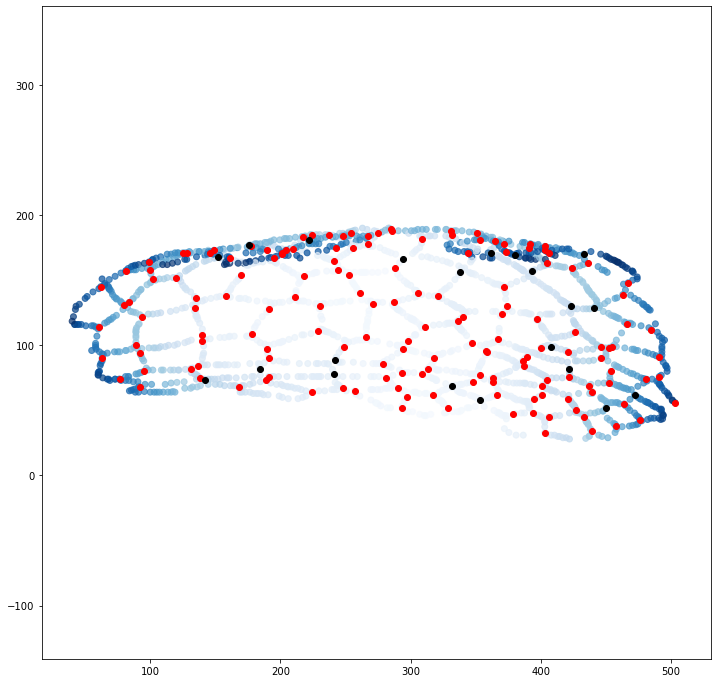

In [506]:
fig, ax = plt.subplots()

ax.scatter(data_crit.x, data_crit.y, c=data_crit.z, cmap='Blues', alpha=0.7)

#ax.scatter(data_crit.loc[[0,3]]['x'], data_crit.loc[[0,3]]['y'], color='red')

data_crit_2 = data_crit[data_crit.n_fil==3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'red')

data_crit_2 = data_crit[data_crit.n_fil>3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'black')

ax.axis('equal')

# ax.set_xlim(300, 400)
# ax.set_ylim(50, 100)
fig.set_size_inches(12, 12)


In [497]:
import ipyvolume as ipv
from matplotlib import cm
data=data_crit.copy()
cmap = cm.get_cmap("viridis")
colors = cmap((data.z-data.z.min())/(data.z.max()-data.z.min()))

ipv.clear()
ipv.scatter(x=np.array(data.x)*10, y=np.array(data.y)*10, z=data.z*10, size=1, color=colors, marker='circle_2d')
ipv.squarelim()
ipv.show()

In [516]:
from itertools import chain

x=[]
y=[]
z=[]
for fp in data_fil.points:
    x.append(list(fp.flatten()[0::3]))
    y.append(list(fp.flatten()[1::3]))
    z.append(list(fp.flatten()[2::3]))
x = list(chain.from_iterable(x))
y = list(chain.from_iterable(y))
z = list(chain.from_iterable(z))

x = list(map(int, x))
y = list(map(int, y))
z = list(map(int, z))


import plotly.graph_objects as go

data1 = go.Scatter3d(x=data_crit.x,
                      y=data_crit.y,
                      z=data_crit.z,
                      mode='markers',
                     marker=dict(
                        size=1,
                        color='black',                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

data0 = go.Scatter3d(x=x,
                      y=y,
                      z=z,
                      mode='markers',
                     marker=dict(
                        size=1,
                        color=z,                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

data_crit_2 = data_crit[data_crit.n_fil>2]

data2 = go.Scatter3d(x=data_crit_2['x'].astype(int),
                      y=data_crit_2['y'].astype(int),
                      z=data_crit_2['z'].astype(int),
                      mode='markers',
                     marker=dict(
                        size=2,
                        color='red',                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

fig = go.Figure(data=[data0, data1, data2])

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))

fig.show()

In [499]:
img0 = io.imread(os.path.join(directory, "image.tif"))
img_output = img0.copy()
img_output = np.where(img_output>0, 0, img_output) 
w = 0
for f in skeleton.fil:
    for p in f.points: 
        if w != 0:
            for z in range(int(p[2])-w,int(p[2])+w):
                for y in range(int(p[1])-w,int(p[1])+w):
                    for x in range(int(p[0])-w,int(p[0])+w):
                        try:
                            img_output[z][y][x]=65000
                        except:
                            pass
        else : 
            x=int(p[0])
            y=int(p[1])
            z=int(p[2])
            img_output[z][y][x]=65000
#io.imsave('binary_images.tif', img_output)

In [500]:
img0.shape

(86, 201, 525)

In [501]:
def activated_pixel(images, center_pos, width=1):
    """
    Cherche les pixels appartenant au masque autour d'un pixel 'center_pos', 
    à une distance d'un pixel
    return toutes les positions des pixel faisant partie du masque
    """
    
    list_activated_pixel={'x':[], 
                        'y':[],
                        'z':[]}
    
    for x in range (center_pos['x']-width, center_pos['x']+width+1):
        for y in range (center_pos['y']-width, center_pos['y']+width+1):
            for z in range (center_pos['z']-width, center_pos['z']+width+1):
                if images[z][y][x]==65000 :
                    if not((x==center_pos['x']) and (y==center_pos['y']) and (z==center_pos['z'])):
                        list_activated_pixel['x'].append(x)
                        list_activated_pixel['y'].append(y)
                        list_activated_pixel['z'].append(z)

    return list_activated_pixel



def length(v):
    return np.sqrt(np.dot(v,v))

def angle_calculation(v1, v2):
    theta = np.arccos(round(np.dot(v1, v2) / (length(v1) * length(v2)),4))*180/np.pi+180 
    x = v2[0]-v1[0]
    y = v2[1]-v1[1]
    z = v2[2]-v1[2]
    phi = np.arctan2(y/(length([x,y,z])*np.sin(theta)), x/(length([x,y,z])*np.sin(theta)))*180/np.pi+180
    return theta

    

In [502]:
# first_color_pixel = {"x":314, "y":189, "z":45}
first_color_pixel = {"x":338, "y":79, "z":11}
# first_color_pixel = {"x":243, "y":133, "z":10}
# first_color_pixel = {"x":456, "y":56, "z":47}
# first_color_pixel = {"x":379, "y":179, "z":56}



#Cadre around the cell
left_top_corner = first_color_pixel
right_bottom_corner = first_color_pixel

cell = {'x':[], 
        'y':[],
        'z':[]}
cell['x'].append(first_color_pixel['x'])
cell['y'].append(first_color_pixel['y'])
cell['z'].append(first_color_pixel['z'])



res = activated_pixel(img_output, first_color_pixel)
cell['x'].append(res['x'][0])
cell['y'].append(res['y'][0])
cell['z'].append(res['z'][0])

# à remplacer par un while qui stope la boucle quand on a fait le tour d'une cellule. 
for cpt in range(300):
    res = activated_pixel(img_output, {'x':cell['x'][-1], 'y':cell['y'][-1], 'z':cell['z'][-1]})
     
    # remove the pixel which is arleady taged
    for pos_cell in range(len(cell['x'])):
        pos = 0
        while pos < len(res['x']):
            if ((cell['x'][pos_cell] == res['x'][pos]) and
                (cell['y'][pos_cell] == res['y'][pos]) and
                (cell['z'][pos_cell] == res['z'][pos])):

                del res['x'][pos]
                del res['y'][pos]
                del res['z'][pos]
    
            else:
                pos +=1
    
    # si le cadre de 1 ne suffit pas, prendre un cadre de 2 autours du pixel de travail 
    if len(res['x'])==0:
        res = activated_pixel(img_output, {'x':cell['x'][-1], 'y':cell['y'][-1], 'z':cell['z'][-1]}, width=2)
        # remove the pixel which is arleady taged
        for pos_cell in range(len(cell['x'])):
            pos = 0
            while pos < len(res['x']):
                if ((cell['x'][pos_cell] == res['x'][pos]) and
                    (cell['y'][pos_cell] == res['y'][pos]) and
                    (cell['z'][pos_cell] == res['z'][pos])):

                    del res['x'][pos]
                    del res['y'][pos]
                    del res['z'][pos]

                else:
                    pos +=1
      
    
    if len(res['x'])>=2 :     
        
        
        nb_contours = len(cell['x'])
        # Decomposition en valeur singulière pour les angles
        rel_pos = []
        for i in range(len(cell['x'])):
            rel_pos.append([cell['x'][i], cell['y'][i], cell['z'][i]])
        for i in range(len(res['x'])):
            rel_pos.append([res['x'][i], res['y'][i], res['z'][i]])
            
        u_, s_, rotation = np.linalg.svd(np.asarray(rel_pos))
        rot_pos = pd.DataFrame(
                    np.dot(rel_pos, rotation.T),
                )
        
        # Toujours tourner à gauche/
        angle_theta = []
        ref_vector = [rot_pos[0][nb_contours-2]-rot_pos[0][nb_contours-1],
                      rot_pos[1][nb_contours-2]-rot_pos[1][nb_contours-1], 
                      rot_pos[2][nb_contours-2]-rot_pos[2][nb_contours-1]]
        
        for pos in range(len(res['x'])):
            tmp_vector = [rot_pos[0][nb_contours+pos]-rot_pos[0][nb_contours-1],
                          rot_pos[1][nb_contours+pos]-rot_pos[1][nb_contours-1], 
                          rot_pos[2][nb_contours+pos]-rot_pos[2][nb_contours-1]]
            theta = angle_calculation(ref_vector, tmp_vector)
            angle_theta.append(theta)
        print(angle_theta)
        pos_min_angle = angle_theta.index(max(angle_theta))
#         pos_max_angle = -1
#         threshold_angle = 350
#         while pos_max_angle ==-1:
#         for pos in range(len(angle_theta)):
#             if (angle_theta[pos]>=180) and (angle_phi[pos]>=180) :
#                 pos_max_angle = pos
#             threshold_angle -=10
        
        cell['x'].append(res['x'][pos_min_angle])
        cell['y'].append(res['y'][pos_min_angle])
        cell['z'].append(res['z'][pos_min_angle])
                    
    else : 
        cell['x'].append(res['x'][0])
        cell['y'].append(res['y'][0])
        cell['z'].append(res['z'][0])
 

[314.99945053347443, 215.26405037533257]
[360.0, 314.99945053347443]
[314.99945053347443, 270.0]
[314.99945053347443, 225.00054946652557]
[360.0, 305.26787950374796, 314.99945053347443]
[360.0, 270.0, 270.0]
[360.0, 234.73212049625207, 225.00054946652557]
[324.73594962466746, 314.99945053347443]
[250.53080506456052, 250.53080506456052, 215.26405037533257]
[360.0, 314.99945053347443, 314.99945053347443]
[305.26787950374796, 270.0, 270.0]
[305.26787950374796, 215.26405037533257]
[360.0, 324.73594962466746]
[270.0, 270.0, 270.0, 270.0]
[305.26787950374796, 215.26405037533257]
[360.0, 314.99945053347443]
[314.99945053347443, 270.0]
[314.99945053347443, 225.00054946652557]
[270.0, 289.4691949354395, 305.26787950374796, 305.26787950374796]
[234.73212049625207, 270.0, 225.00054946652557]
[324.73594962466746, 314.99945053347443, 270.0]
[250.53080506456052, 305.26787950374796, 215.26405037533257, 215.26405037533257]
[324.73594962466746, 270.0]
[240.0, 300.0]
[240.0, 300.0]
[314.99945053347443, 

IndexError: list index out of range

In [14]:

trace1=go.Scatter3d(x=x,
                  y=y,
                  z=z,
                  mode='markers',
                 marker=dict(
                    size=1,
                    color='black',                # set color to an array/list of desired values
                    colorscale='Viridis',   # choose a colorscale
                    opacity=0.8
                 )
)




trace2=go.Scatter3d(x=cell['x']*10,
                  y=cell['y']*10,
                  z=cell['z']*10,
                  mode='markers',
                 marker=dict(
                    size=2,
                    color='red',                # set color to an array/list of desired values
                    opacity=0.2
                 )
)

# res = []
# for i in range(len(cell['x'])):
#     res.append([cell['x'][i], cell['y'][i], cell['z'][i]])
# hull = scipy.spatial.ConvexHull(np.asarray(res))

# trace3=go.Scatter3d(x = [res[i][0] for i in hull.vertices],
#                       y = [res[i][1] for i in hull.vertices],
#                       z = [res[i][2] for i in hull.vertices],
#                   mode='lines',
#                  marker=dict(
#                     size=20,
#                     color='green', 
#                     opacity=0.8
#                  )
# )

data=[trace2, trace1]

fig = go.Figure(data=data)

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))
fig.show()

In [472]:
img0 = io.imread(os.path.join(directory, "image.tif"))
img_output2 = img0.copy()
img_output2 = np.where(img_output>0, 0, img_output) 
w = 1
for f in skeleton.fil:
    for p in f.points: 
        if w != 0:
            for z_ in range(int(p[2])-w,int(p[2])+w):
                for y_ in range(int(p[1])-w,int(p[1])+w):
                    for x_ in range(int(p[0])-w,int(p[0])+w):
                        try:
                            img_output2[z_][y_][x_]=1
                        except:
                            pass
        else : 
            x_=int(p[0])
            y_=int(p[1])
            z_=int(p[2])
            img_output2[z_][y_][x_]=1

In [473]:
file = open('data_enlarge.dat', 'w')
for z_ in range(img_output2.shape[0]):
    for y_ in range(img_output2.shape[1]):
        for x_ in range( img_output2.shape[2]):
            if img_output2[z_][y_][x_]==1:
                sentance = x_, y_, z_
                file.write(str(sentance) + '\n')
                
file.close()
                

In [484]:
dat = pd.DataFrame.from_records(dat)

In [490]:
dat = dat[dat[0]>30]

In [491]:

trace1=go.Scatter3d(x=x,
                  y=y,
                  z=z,
                  mode='markers',
                 marker=dict(
                    size=1,
                    color='black',                # set color to an array/list of desired values
                    colorscale='Viridis',   # choose a colorscale
                    opacity=0.2
                 )
)




trace2=go.Scatter3d(x=dat[1],
                  y=dat[2],
                  z=dat[3],
                  mode='markers',
                 marker=dict(
                    size=2,
                    color='red',                # set color to an array/list of desired values
                    opacity=0.8
                 )
)


data=[trace2, trace1]

fig = go.Figure(data=data)
# Create scatter trace of text labels
for id_ in (dat.index):
    fig.add_trace(go.Scatter3d(
                    x=[dat[1][id_],dat[1][id_]+dat[4][id_]*50],
                      y=[dat[2][id_], dat[2][id_]+dat[5][id_]*50],
                      z=[dat[3][id_], dat[3][id_]+dat[6][id_]*50],
                      mode='lines',
                     line=dict(
                        width=5,
                        color='blue',                # set color to an array/list of desired values
                        
                     )))


fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))
fig.show()

In [ ]:
#TTRIANGULATION DE DELAUNAY

In [207]:
from scipy.spatial import Delaunay, Voronoi
pos = []
for i in range(len(x)):
    pos.append([x[i], y[i], z[i]])
pos  = np.array(pos)
tri = Delaunay(pos)

In [208]:
tri.simplices

array([[10952, 10777, 11048, 10573],
       [10779, 10777, 11048, 10573],
       [10780, 10779, 10777, 11048],
       ...,
       [ 2621,  2638,  2625,  2132],
       [ 2621,  2635,  2619,  2132],
       [ 2621,  2618,  2619,  2132]], dtype=int32)

In [209]:
import plotly as py
import plotly.figure_factory as FF

trace1=go.Scatter3d(x=x,
                  y=y,
                  z=z,
                  mode='markers',
                 marker=dict(
                    size=1,
                    color='black',                # set color to an array/list of desired values
                    colorscale='Viridis',   # choose a colorscale
                    opacity=0.8
                 )
)
fig1 =FF.create_trisurf(x=pos[:,0], y=pos[:,1], z=pos[:,2],
                         simplices=tri.convex_hull, showbackground=True,
                       colormap="Reds",)
                         #title="", aspectratio=dict(x=1, y=1, z=0.3))

    
fig1['data'][0].update(opacity=0.9)
fig1['data'][1].update(line=dict(color='red',
                                width=2))
data=[fig1.data[0], fig1.data[1], trace1]


fig = go.Figure(data=data)

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))
fig.show()

    
    
# fig1.update_layout(title='Filament', autosize=False,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig1['layout'].update(scene=dict(aspectmode="data"))
# fig1.show()

In [300]:
def subdivide(verts, faces):
    """Subdivide each triangle into four triangles, pushing verts to the unit sphere"""
    triangles = len(faces)
    for faceIndex in range(triangles):
    
        # Create three new verts at the midpoints of each edge:
        face = faces[faceIndex]
        a = face[0]
        b = face[1]
        c = face[2]
            
        verts.append((a + b)[:])
        verts.append((b + c)[:])
        verts.append((a + c)[:])

        # Split the current triangle into four smaller triangles:
        i = len(verts) - 3
        j, k = i+1, i+2
        faces.append((i, j, k))
        faces.append((face[0], i, k))
        faces.append((i, face[1], j))
        faces[faceIndex] = (k, j, face[2])

    return verts, faces

In [301]:
subdivide(pos.tolist(), tri.convex_hull)

IndexError: invalid index to scalar variable.

In [306]:
import numpy as np

#unit normal vector of plane defined by points a, b, and c
def unit_normal(a, b, c):
    x = np.linalg.det([[1,a[1],a[2]],
         [1,b[1],b[2]],
         [1,c[1],c[2]]])
    y = np.linalg.det([[a[0],1,a[2]],
         [b[0],1,b[2]],
         [c[0],1,c[2]]])
    z = np.linalg.det([[a[0],a[1],1],
         [b[0],b[1],1],
         [c[0],c[1],1]])
    magnitude = (x**2 + y**2 + z**2)**.5
    return (x/magnitude, y/magnitude, z/magnitude)

#area of polygon poly
def poly_area(poly):
    if len(poly) < 3: # not a plane - no area
        return 0
    total = [0, 0, 0]
    N = len(poly)
    for i in range(N):
        vi1 = poly[i]
        vi2 = poly[(i+1) % N]
        prod = np.cross(vi1, vi2)
        total[0] += prod[0]
        total[1] += prod[1]
        total[2] += prod[2]
    result = np.dot(total, unit_normal(poly[0], poly[1], poly[2]))
    return abs(result/2)

In [307]:
poly = [[0, 0, 0], [10, 0, 0], [10, 3, 4], [0, 3, 4]]
poly_translated = [[0+5, 0+5, 0+5], [10+5, 0+5, 0+5], [10+5, 3+5, 4+5], [0+5, 3+5, 4+5]]
print(area(poly))
print(area(poly_translated))
print(area([[0,0,0],[1,1,1]]))


50.0
50.0
0
